In [1]:
from pyridge.negcor.nc_elm import NegativeCorrelationELM
from pyridge.util import prepare_data, metric_dict
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Select one k-fold of the data (0), load train and test folds and scale
train_data, train_target, data_scaler, target_scaler = \
        prepare_data(folder='data/qsar-biodegradation',
                     dataset='train_qsar-biodegradation.0')
test_data, test_target, _, _ = prepare_data(folder='data/qsar-biodegradation',
                                            dataset='test_qsar-biodegradation.0',
                                            data_scaler=data_scaler,
                                            target_scaler=target_scaler)

In [3]:
plot_dict = dict()
for lambda_ in [10**-6, 10**-5, 10**-4]:  # For a range of lambda values
    parameter = {'activation': 'sigmoid',
                 'hidden_neurons': 50,
                 'reg': 1.0,
                 'lambda_': lambda_,
                 'max_iter_': 5,
                 'size': 25}

    clf = NegativeCorrelationELM()
    clf.fit(train_data=train_data,
            train_target=train_target,
            parameter=parameter)

    acc = metric_dict['accuracy'](clf, test_data, test_target)
    print('C =', 10.0, ', lambda =', lambda_, ', accuracy =', acc)
    plot_dict.update({lambda_: clf.list_norm})

C = 10.0 , lambda = 1e-06 , accuracy = 0.9056603773584906
C = 10.0 , lambda = 1e-05 , accuracy = 0.8867924528301887
C = 10.0 , lambda = 0.0001 , accuracy = 0.6132075471698113


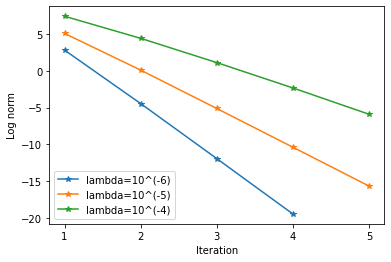

In [5]:
i = 0
plt.figure(i)
for lambda_, list_norm in plot_dict.items():
    range_x = np.arange(1, len(list_norm) + 1)
    plt.plot(range_x, np.log(list_norm), '*-', label="lambda=10^(%i)"%(np.log10(lambda_),))
    i += 1
plt.legend(loc='lower left', ncol=1, fancybox=True)
plt.ylabel('Log norm')
plt.xlabel('Iteration')
plt.xticks(range_x)
plt.savefig('images/ncelm_convergence.pdf')
plt.show()